# Prevendo o peso cerebral

In [1]:
#Importar bibliotecas
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as plt
%matplotlib inline
import scipy.stats as ss

#Filtrar warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

#Colocar os parametros dos graficos

plt.rcParams['figure.figsize'] = (10,6)

#Separação dos dados em treino e teste
from sklearn.model_selection import train_test_split

#Padronização

from sklearn.preprocessing import StandardScaler

#Modelo de Regressão
import statsmodels.api as sm
from sklearn import linear_model

#Métricas
from sklearn.metrics import r2_score

In [2]:
#importando dados
data = pd.read_csv('pesos2.csv')

In [3]:
data.head()

,Sexo,Grupo,Head Size,Brain Weight
0,1,1,4512,1530
1,1,1,3738,1297
2,1,1,4261,1335
3,1,1,3777,1282
4,1,1,4177,1590


In [4]:
#Verificando o formato dos dados
data.shape

(237, 4)

In [5]:
#Verificando os tipos 
data.dtypes

Sexo            int64
Grupo           int64
Head Size       int64
Brain Weight    int64
dtype: object

In [6]:
#verificando se há valores NaN
data.isnull().sum()

Sexo            0
Grupo           0
Head Size       0
Brain Weight    0
dtype: int64

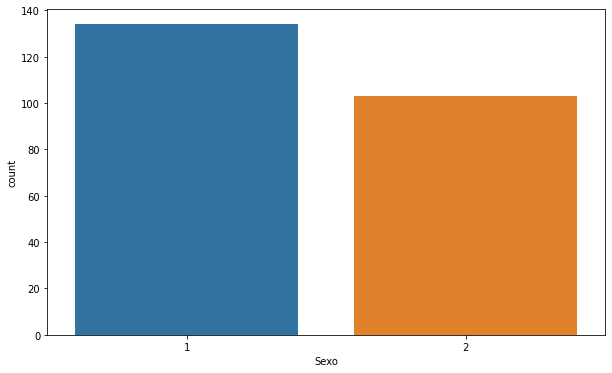

In [7]:
#Verificando a variável Sexo
sns.countplot(x= 'Sexo', data = data)

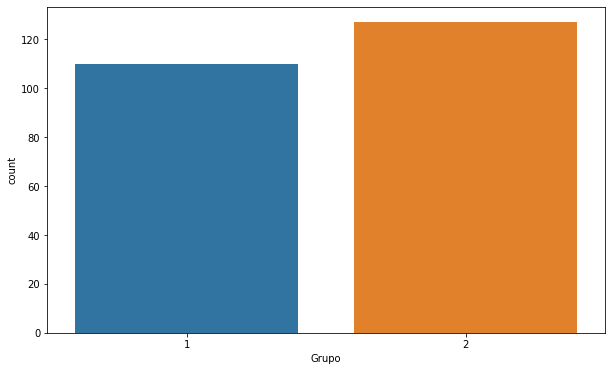

In [8]:
#Verificando a variável Grupo
sns.countplot(x= 'Grupo', data = data)

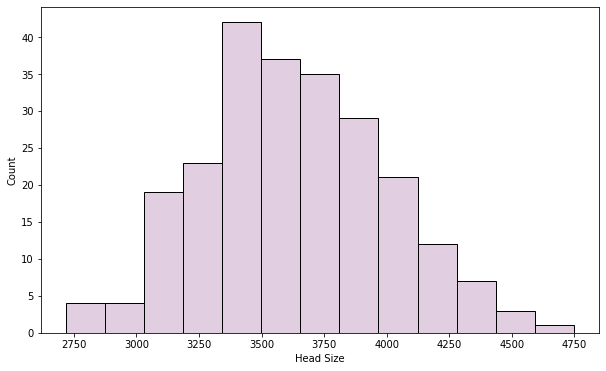

In [9]:
#Verificando o comportamento da variável tamanho da cabeça (Head Size)
#data['Head Size'].hist()
sns.histplot( data, x='Head Size', color = 'thistle')

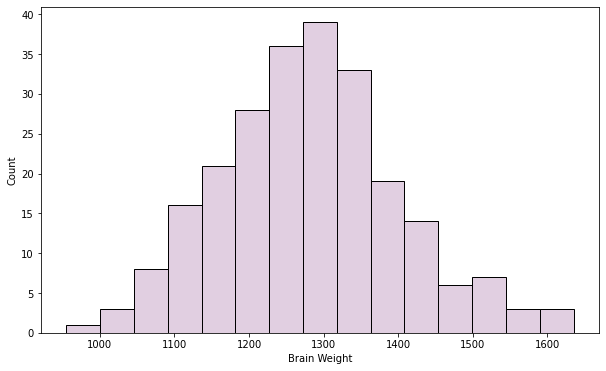

In [10]:
#Verificando o comportamento da variável peso cerebral (Brain Weight)

sns.histplot( data, x='Brain Weight', color = 'thistle')


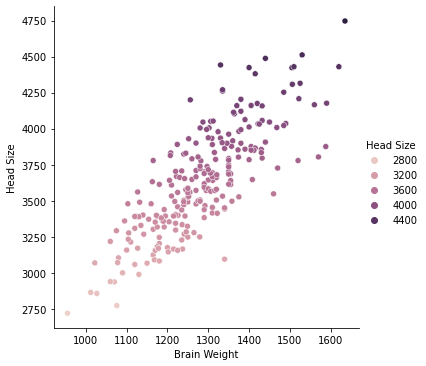

In [11]:
sns.relplot(x="Brain Weight", y="Head Size", hue= "Head Size", data=data);

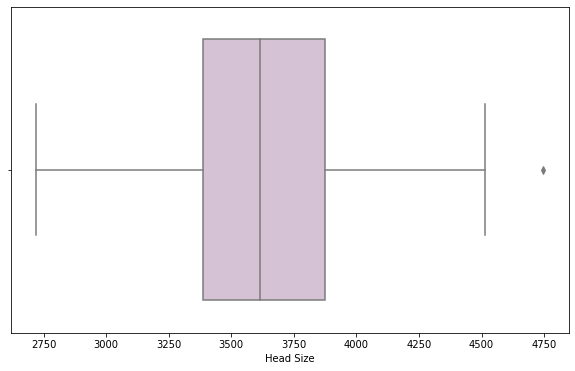

In [12]:
# Boxplot de uma variável
sns.boxplot(x = "Head Size", color = 'thistle', data = data)

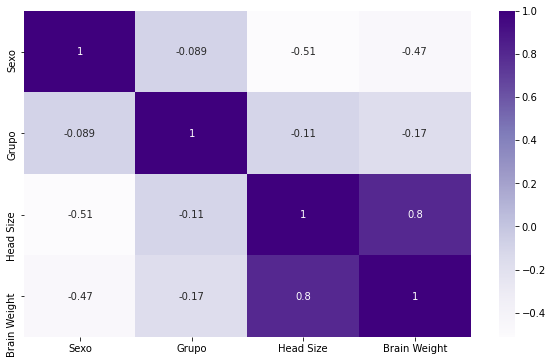

In [13]:
corr = data.corr()
sns.heatmap(corr, annot = True, cmap="Purples")

In [14]:
data.dtypes

Sexo            int64
Grupo           int64
Head Size       int64
Brain Weight    int64
dtype: object

In [15]:
#Separando as variaveis qualitativas binárias
data_quali = data.drop(columns = ['Head Size'], axis = 1)

In [16]:
# E então colocamos os valores das variáveis binárias como float
for col in data_quali.columns:
    data_quali[col] = data_quali[col].apply(lambda x: float(x))

Text(0.5, 1.0, 'Recursos Binários: Visualizando os 1s (os valores restantes são 0.)')

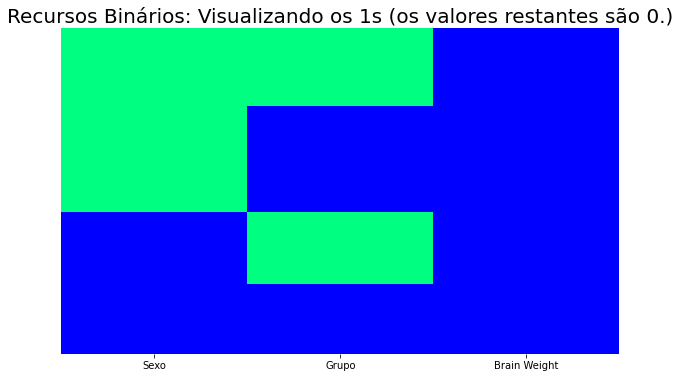

In [17]:
# Plot

p = sns.heatmap(data_quali == 1, yticklabels = False, cbar = False,  cmap="winter")
p.axes.set_title("Recursos Binários: Visualizando os 1s (os valores restantes são 0.)", fontsize = 20)

In [18]:
# Função para calcular a associação entre variáveis categóricas

# Função
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    
    # Teste qui-quadrado de independência de variáveis em uma tabela de contingência.
    chi2 = ss.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2/n
    r,k = confusion_matrix.shape
    phi2corr = max(0, phi2-((k-1)*(r-1))/(n-1))
    rcorr = r-((r-1)**2)/(n-1)
    kcorr = k-((k-1)**2)/(n-1)
    return np.sqrt(phi2corr/min((kcorr-1),(rcorr-1)))

In [19]:
# Coleta o nome das colunas do dataset

# Lista
categorical_vars = []

# Loop
for column in data_quali:
    categorical_vars.append(column)

In [20]:
# Visualiza
categorical_vars

['Sexo', 'Grupo', 'Brain Weight']

In [21]:
# Variável alvo
y = 'Brain Weight'

# Print
print('\nA Associação é um resultado no intervalo de [0,1], em que 0 significa nenhuma associação e 1 é associação completa.')
print('\n')

# Loop
for var in categorical_vars:
    print('Associação da Variável ' + var + ' com a variável resposta:', 
          cramers_v(data_quali[var], data_quali[y]))


A Associação é um resultado no intervalo de [0,1], em que 0 significa nenhuma associação e 1 é associação completa.


Associação da Variável Sexo com a variável resposta: 0.2544837887245261
Associação da Variável Grupo com a variável resposta: 0.0
Associação da Variável Brain Weight com a variável resposta: 1.0000000000000002


In [22]:
#Separando os dados em variáveis independentes e dependentes
x= data.drop('Brain Weight', axis = 1)
y= data['Brain Weight']

In [23]:
#Separando os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=121)

In [24]:
X_train.shape, X_test.shape

((165, 3), (72, 3))

In [25]:
y_train.shape, y_test.shape

((165,), (72,))

In [26]:
#Padronizando os dados
#scaler = StandardScaler()
#X_train_scaled = scaler.fit_transform(X_train.values)
#X_teste_scaled = scaler.transform(X_test.values)

In [27]:
#X_train_scaled.shape

In [28]:
#y_train.shape

## Modelo 1 -  Regressão Linear com StatsModels

In [29]:
v1 = sm.OLS( y_train,X_train).fit()

v1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:           Brain Weight   R-squared (uncentered):                   0.996
Model:                            OLS   Adj. R-squared (uncentered):              0.996
Method:                 Least Squares   F-statistic:                          1.373e+04
Date:                Thu, 12 Nov 2020   Prob (F-statistic):                   1.12e-194
Time:                        20:52:32   Log-Likelihood:                         -959.71
No. Observations:                 165   AIC:                                      1925.
Df Residuals:                     162   BIC:                                      1935.
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Sexo          30.4705     11.445      2.662      0.009       7.871      53.070
Grupo          0.7392     12.111      0.061      0.951     -23.177      24.655
Head Size      0.3414      0.006     55.251      0.000       0.329       0.354
==============================================================================
Omnibus:                        3.047   Durbin-Watson:                   1.808
Prob(Omnibus):                  0.218   Jarque-Bera (JB):                2.659
Skew:                           0.216   Prob(JB):                        0.265
Kurtosis:                       3.448   Cond. No.                     7.43e+03
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 7.43e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Modelo 2 - Regressão Linear com StatsModels sem a Variável Grupo


In [30]:
X_train = X_train.drop('Grupo',axis = 1)
X_train = sm.add_constant(X_train)

In [31]:
X_test = X_test.drop('Grupo',axis = 1)
X_test = sm.add_constant(X_test)

In [32]:
v2 = sm.OLS( y_train,X_train).fit()

v2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Brain Weight   R-squared:                       0.625
Model:                            OLS   Adj. R-squared:                  0.620
Method:                 Least Squares   F-statistic:                     135.0
Date:                Thu, 12 Nov 2020   Prob (F-statistic):           3.14e-35
Time:                        20:52:33   Log-Likelihood:                -945.62
No. Observations:                 165   AIC:                             1897.
Df Residuals:                     162   BIC:                             1907.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        438.7844     79.863      5.494      0.000     281.078     596.491
Sexo         -23.0778     14.201     -1.625      0.106     -51.121       4.966
Head Size      0.2424      0.019     13.083      0.000       0.206       0.279
==============================================================================
Omnibus:                        9.981   Durbin-Watson:                   1.843
Prob(Omnibus):                  0.007   Jarque-Bera (JB):               10.338
Skew:                           0.512   Prob(JB):                      0.00569
Kurtosis:                       3.674   Cond. No.                     5.04e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.04e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Modelo 3 - Regressão Linear com StatsModels sem a Variável Grupo e Sexo

In [34]:
X_train = X_train.drop(columns= ['Sexo'],axis = 1)
X_train = sm.add_constant(X_train)

In [35]:
v3 = sm.OLS( y_train,X_train).fit()

v3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Brain Weight   R-squared:                       0.619
Model:                            OLS   Adj. R-squared:                  0.617
Method:                 Least Squares   F-statistic:                     264.7
Date:                Thu, 12 Nov 2020   Prob (F-statistic):           5.67e-36
Time:                        20:53:52   Log-Likelihood:                -946.95
No. Observations:                 165   AIC:                             1898.
Df Residuals:                     163   BIC:                             1904.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        349.4898     58.245      6.000      0.000     234.478     464.502
Head Size      0.2581      0.016     16.269      0.000       0.227       0.289
==============================================================================
Omnibus:                        9.645   Durbin-Watson:                   1.857
Prob(Omnibus):                  0.008   Jarque-Bera (JB):                9.800
Skew:                           0.514   Prob(JB):                      0.00745
Kurtosis:                       3.607   Cond. No.                     3.63e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.63e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""